    Prepare a classification model using Naive Bayes for salary data 

    Data Description:

    age-- age of a person
    workclass -- A work class is a grouping of work 
    education -- Education of an individuals	
    maritalstatus -- Marital status of an individulas	
    occupation -- occupation of an individuals
    relationship -- 	
    race --  Race of an Individual
    sex --  Gender of an Individual
    capitalgain --  profit received from the sale of an investment	
    capitalloss	-- A decrease in the value of a capital asset
    hoursperweek -- number of hours work per week	
    native -- Native of an individual
    Salary -- salary of an individual

### Importing the Required Libraries

In [1]:
# importing the basic libraries 
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

# to remove warnings
import warnings
warnings.filterwarnings("ignore")

#### Reading the Train dataset 

In [2]:
traindf = pd.read_csv("SalaryData_Train.csv")
traindf.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#### Reading the Test dataset

In [3]:
testdf = pd.read_csv("SalaryData_Test.csv")
testdf.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


### Performing EDA on the Train data

In [4]:
# to get the information of the datafile
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [5]:
# summarizing the datafile
traindf.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [6]:
# to check the null values of the data
traindf.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [7]:
print("Dimensions -",traindf.shape)
print("Column names -",traindf.columns)

Dimensions - (30161, 14)
Column names - Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')


In [8]:
# summarising the information using crosstab
pd.crosstab(traindf['occupation'],traindf['Salary'])

Salary,<=50K,>50K
occupation,,
Adm-clerical,3223,498
Armed-Forces,8,1
Craft-repair,3122,908
Exec-managerial,2055,1937
Farming-fishing,874,115
Handlers-cleaners,1267,83
Machine-op-inspct,1720,245
Other-service,3080,132
Priv-house-serv,142,1


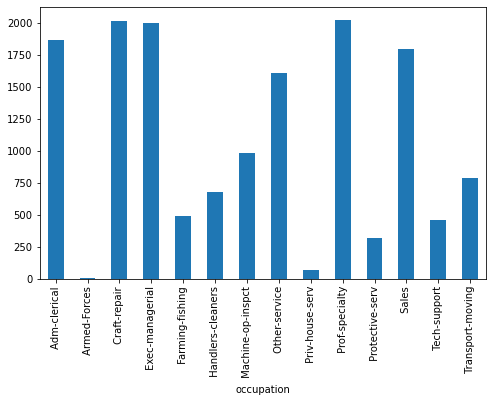

In [9]:
plt.figure(figsize=(8,5))
pd.crosstab(traindf['Salary'],traindf['occupation']).mean().plot(kind='bar');

In [10]:
# to check the dimensions of duplicates in the train data
traindf[traindf.duplicated()].shape

(3258, 14)

In [11]:
# to get the duplicate values from the train data
traindf[traindf.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
326,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
364,27,Private,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,50,United-States,<=50K
518,24,Private,HS-grad,9,Never-married,Handlers-cleaners,Unmarried,Black,Female,0,0,40,United-States,<=50K
525,24,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
619,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30110,47,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
30118,20,Private,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,<=50K
30132,22,Private,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


In [12]:
# Removing the duplicates 
train = traindf.drop_duplicates()
train.iloc[1010:2021]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
1020,29,Private,HS-grad,9,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,25,United-States,<=50K
1021,41,Private,Bachelors,13,Married-civ-spouse,Craft-repair,Husband,White,Male,3103,0,40,United-States,>50K
1022,41,Private,Assoc-voc,11,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,55,United-States,<=50K
1023,35,Self-emp-inc,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,Mexico,>50K
1024,33,Private,Bachelors,13,Married-civ-spouse,Sales,Wife,White,Female,0,0,45,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2035,64,Self-emp-not-inc,HS-grad,9,Never-married,Other-service,Not-in-family,White,Male,1055,0,40,United-States,<=50K
2036,33,Private,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,48,United-States,>50K
2037,23,Private,Some-college,10,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
2038,45,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,>50K


In [13]:
# Resetting the index
train = train.reset_index()
train = train.drop(columns="index")
train.iloc[1010:2021]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
1010,29,Private,HS-grad,9,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,25,United-States,<=50K
1011,41,Private,Bachelors,13,Married-civ-spouse,Craft-repair,Husband,White,Male,3103,0,40,United-States,>50K
1012,41,Private,Assoc-voc,11,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,55,United-States,<=50K
1013,35,Self-emp-inc,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,Mexico,>50K
1014,33,Private,Bachelors,13,Married-civ-spouse,Sales,Wife,White,Female,0,0,45,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,64,Self-emp-not-inc,HS-grad,9,Never-married,Other-service,Not-in-family,White,Male,1055,0,40,United-States,<=50K
2017,33,Private,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,48,United-States,>50K
2018,23,Private,Some-college,10,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
2019,45,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,>50K


In [14]:
# Label Encoding the train data
label = LabelEncoder()
names = train[["workclass", "education", "maritalstatus", "occupation", 
               "relationship", "race", "sex", "native", "Salary"]]

for i in names:
    train[i] = label.fit_transform(train[i])
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0


### Performing EDA on the Test data

In [15]:
# to get the information of the datafile
testdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [16]:
# summarizing the datafile
testdf.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [17]:
# to check the null values of the data
testdf.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [18]:
print("Dimensions -",testdf.shape)
print("Column names -",testdf.columns)

Dimensions - (15060, 14)
Column names - Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')


In [19]:
# summarising the information using crosstab
pd.crosstab(testdf['occupation'],testdf['Salary'])

Salary,<=50K,>50K
occupation,,
Adm-clerical,1561,258
Armed-Forces,2,3
Craft-repair,1543,447
Exec-managerial,1062,930
Farming-fishing,434,57
Handlers-cleaners,644,52
Machine-op-inspct,884,120
Other-service,1532,64
Priv-house-serv,87,2


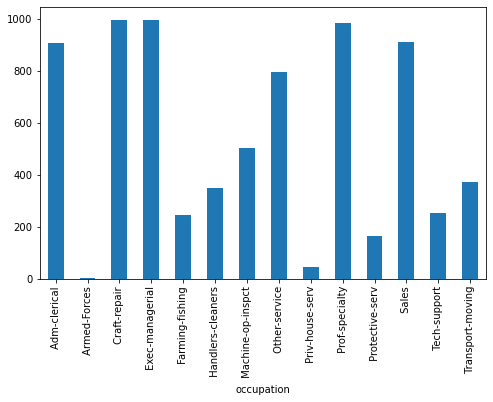

In [20]:
plt.figure(figsize=(8,5))
pd.crosstab(testdf['Salary'],testdf['occupation']).mean().plot(kind='bar');

In [21]:
# to check the dimensions of duplicates in the test data
testdf[testdf.duplicated()].shape

(930, 14)

In [22]:
# to get the duplicate values from the test data
testdf[testdf.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
551,59,Private,HS-grad,9,Divorced,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K
601,32,Private,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
681,40,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
799,24,Private,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,35,United-States,<=50K
1044,44,Private,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,60,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15043,51,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
15044,22,Private,Some-college,10,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
15049,32,Private,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K
15052,31,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K


In [23]:
# Removing the duplicates 
test = testdf.drop_duplicates()
test.iloc[1010:2021]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
1014,26,Private,Masters,14,Never-married,Exec-managerial,Not-in-family,Black,Male,6849,0,50,United-States,<=50K
1015,39,Private,HS-grad,9,Never-married,Craft-repair,Not-in-family,White,Male,0,0,54,United-States,<=50K
1016,34,State-gov,HS-grad,9,Separated,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K
1017,55,Private,Bachelors,13,Married-civ-spouse,Machine-op-inspct,Husband,Asian-Pac-Islander,Male,0,0,40,India,<=50K
1018,33,Self-emp-not-inc,Assoc-voc,11,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,76,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2039,23,Private,HS-grad,9,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,<=50K
2040,30,Private,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,50,United-States,<=50K
2041,33,Federal-gov,Some-college,10,Never-married,Exec-managerial,Not-in-family,Black,Female,0,0,40,United-States,<=50K
2042,21,Private,HS-grad,9,Widowed,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K


In [24]:
# Resetting the index
test = test.reset_index()
test = test.drop(columns="index")
test.iloc[1010:2021]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
1010,26,Private,Masters,14,Never-married,Exec-managerial,Not-in-family,Black,Male,6849,0,50,United-States,<=50K
1011,39,Private,HS-grad,9,Never-married,Craft-repair,Not-in-family,White,Male,0,0,54,United-States,<=50K
1012,34,State-gov,HS-grad,9,Separated,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K
1013,55,Private,Bachelors,13,Married-civ-spouse,Machine-op-inspct,Husband,Asian-Pac-Islander,Male,0,0,40,India,<=50K
1014,33,Self-emp-not-inc,Assoc-voc,11,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,76,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,23,Private,HS-grad,9,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,<=50K
2017,30,Private,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,50,United-States,<=50K
2018,33,Federal-gov,Some-college,10,Never-married,Exec-managerial,Not-in-family,Black,Female,0,0,40,United-States,<=50K
2019,21,Private,HS-grad,9,Widowed,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K


In [25]:
# Label Encoding the train data
label = LabelEncoder()
names = test[["workclass", "education", "maritalstatus", "occupation", 
              "relationship", "race", "sex", "native", "Salary"]]

for i in names:
    test[i] = label.fit_transform(test[i])
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0


### Splitting the Train & the Test data

In [26]:
X_train = train.iloc[:,0:13] # all columns except 'Salary'
y_train = train.iloc[:,13] # only 'Salary' column

X_test = test.iloc[:, 0:13]
y_test = test.iloc[:, 13]

### Normalization of the data

In [27]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return x

X_train = norm_func(X_train)
X_test = norm_func(X_test)

### Building the Model
    Using Gaussian Naive Bayes

In [28]:
# fitting the Gaussian Naive Bayes model
Gnb = GaussianNB()
Gnb.fit(X_train, y_train)

GaussianNB()

In [29]:
# to get the predictions
pred_gnb = Gnb.predict(X_test)
pred_gnb

array([0, 0, 0, ..., 0, 1, 0])

In [30]:
# Confusion matrix for accuracy testing
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred_gnb)

array([[10030,   590],
       [ 2296,  1214]], dtype=int64)

In [31]:
# to get the accuracy score
accuracy = accuracy_score(y_test, pred_gnb)
print((accuracy)*100)

79.57537154989384


In [32]:
print("The accuracy of the Gaussian NB classifier on training data is {:.2f}".format(Gnb.score(X_train, y_train)*100))

print("The accuracy of the Gaussian NB classifier on test data is {:.2f}".format(Gnb.score(X_test, y_test)*100))

The accuracy of the Gaussian NB classifier on training data is 79.56
The accuracy of the Gaussian NB classifier on test data is 79.58


### Building the Model
    Using Multinomial Naive Bayes

In [33]:
# fitting the Multinomial Naive Bayes model
Mnb = MultinomialNB()
Mnb.fit(X_train, y_train)

MultinomialNB()

In [34]:
# to get the predictions
pred_mnb = Mnb.predict(X_test)
pred_mnb

array([0, 0, 0, ..., 0, 0, 0])

In [35]:
# Confusion matrix for accuracy testing
confusion_matrix(y_test,pred_mnb)

array([[10616,     4],
       [ 3425,    85]], dtype=int64)

In [36]:
# to get the accuracy score
accuracy = accuracy_score(y_test, pred_mnb)
print((accuracy)*100)

75.73248407643312


In [37]:
print("The accuracy of the Multinomial NB classifier on training data is {:.2f}".format(Mnb.score(X_train, y_train)*100))

print("The accuracy of the Multinomial NB classifier on test data is {:.2f}".format(Mnb.score(X_test, y_test)*100))

The accuracy of the Multinomial NB classifier on training data is 74.99
The accuracy of the Multinomial NB classifier on test data is 75.73


### Conclusion:

    Since the Gaussian Naive Bayes model has greater accuracy when compared, the use of Gaussian NB classifier on the Salary Data would be preferred.